# Ames Housing Example
## Goal
Prove the efficiency of the `autolearn` module for regression problems.

## Methodology
Evaluate performance through a [Kaggle](https://www.kaggle.com/) competition.

### About Kaggle
[Kaggle](https://www.kaggle.com/) is an online community of data scientists and machine learners, owned by Google, Inc. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Kaggle))

### About the Competition

#### House Prices: Advanced Regression Techniques
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Check out the competition [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

#### About the Dataset
The [Ames Housing](https://jse.amstat.org/v19n3/decock.pdf) dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. It is a dataset describing the sale of individual residential property in Ames, Iowa from 2006 to 2010. The data set contains 2930 observations and a large number of explanatory  variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values.

![Ames, IA](https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Ames_Montage.jpg/250px-Ames_Montage.jpg) 

#### Goal
The competition [goal](https://www.kaggle.com/c/house-prices-advanced-regression-techniques#evaluation) defined by Kaggle is:
>"It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable." 

#### Metric
They also explain how evaluation will be made:
>"Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)"

#### Submission File Format
For the metric to work as expected, the competitor must submit its results in a csv file in the specified format:
```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

## Imports & Configs

In [1]:
import missingno as msno
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import autolearn
from autolearn import feature

Kaggle already divided the dataset in two parts, a train set, and a test set (in which the competition evalatuation is done).

### Train Set

In [2]:
train = pd.read_csv(r"data\train.csv", index_col=0)
print(f"Number of Features = {train.shape[1]}")
print(f"Number of Rows = {train.shape[0]}")

# # TEMP
# train = train.sample(200)

train.head()

Number of Features = 80
Number of Rows = 1460


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Test Set

In [3]:
test = pd.read_csv(r"data\test.csv", index_col=0)
print(f"Number of Features = {test.shape[1]}")
print(f"Number of Rows = {test.shape[0]}")
test.head()

Number of Features = 79
Number of Rows = 1459


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Notice that the test set has one feature missing. It is `SalePrice`. This is our target.

In [4]:
target = "SalePrice"

## Data Cleaning
The `autolearn` module requires that the dataset is previously cleaned.

I'll merge both datasets to avoid duplicated commands while cleaning. Both receive a column called dataset which will be used to split the datasets later.

In [5]:
train["dataset"] = "train"
test["dataset"] = "test"
df = pd.concat((train, test))

The file `data_description.txt` helps undestanding each feature and what transformations should be done.

In [6]:
with open(r"data\data_description.txt") as file:
    description = file.read()
print(description)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

This dataset has a lot of categorical features. This is far from ideal. They should all be converted into numerical features.

## Categorical Features

The next function will be used to enconde some features.

In [7]:
def encode(data, column, replacements):
    """ Encode categorical data. """
    for to_replace, value in replacements.items():
        df[column] = df[column].replace(to_replace=to_replace, value=value)
    
    df[column] = df[column].astype("int16", errors="ignore")
    uniques = [str(unique) for unique in df[column].unique()]
    print(f"Uniques = {', '.join(uniques)}")
    
    return df

### Street
Type of road access to property
* Grvl: Gravel	
* Pave: Paved

In [8]:
df = encode(data=df, column="Street", replacements={"Grvl": 0, "Pave": 1})

Uniques = 1, 0


### Alley
Type of alley access to property
* Grvl: Gravel
* Pave: Paved
* NA: No alley access

In [9]:
df = encode(data=df, column="Alley", replacements={np.nan: 0, "Grvl": 1, "Pave": 2})

Uniques = 0, 1, 2


### LotShape
General shape of property
* Reg: Regular	
* IR1: Slightly irregular
* IR2: Moderately Irregular
* IR3: Irregular

In [10]:
df = encode(data=df, column="LotShape", replacements={"Reg": 3, "IR1": 2, "IR2": 1, "IR3": 0})

Uniques = 3, 2, 1, 0


### Utilities
Type of utilities available
* AllPub: All public Utilities (E,G,W,& S)
* NoSewr: Electricity, Gas, and Water (Septic Tank)
* NoSeWa: Electricity and Gas Only
* ELO: Electricity only

In [11]:
df = encode(data=df, column="Utilities", replacements={"AllPub": 3, "NoSewr": 2, "NoSeWa": 1, "ELO": 0})

Uniques = 3.0, 1.0, nan


### LandSlope
Slope of property
* Gtl: Gentle slope
* Mod: Moderate Slope
* Sev: Severe Slope

In [12]:
df = encode(data=df, column="LandSlope", replacements={"Gtl": 2, "Mod": 1, "Sev": 0})

Uniques = 2, 1, 0


### ExterQual
Evaluates the quality of the material on the exterior
* Ex: Excellent
* Gd: Good
* TA: Average/Typical
* Fa: Fair
* Po: Poor

In [13]:
df = encode(data=df, column="ExterQual", replacements={"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po": 0})

Uniques = 3, 2, 4, 1


### ExterCond
Evaluates the present condition of the material on the exterior
* Ex: Excellent
* Gd: Good
* TA: Average/Typical
* Fa: Fair
* Po: Poor

In [14]:
df = encode(data=df, column="ExterCond", replacements={"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po": 0})

Uniques = 2, 3, 1, 0, 4


### BsmtQual
Evaluates the height of the basement
* Ex: Excellent (100+ inches)
* Gd: Good (90-99 inches)
* TA: Average/Typical (80-89 inches)
* Fa: Fair (70-79 inches)
* Po: Poor (<70 inches)
* NA: No Basement

In [15]:
df = encode(data=df, column="BsmtQual", replacements={"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, np.nan: 0})

Uniques = 4, 3, 5, 0, 2


### BsmtCond
Evaluates the general condition of the basement
* Ex: Excellent
* Gd: Good
* TA: Typical - slight dampness allowed
* Fa: Fair - dampness or some cracking or settling
* Po: Poor - Severe cracking, settling, or wetness
* NA: No Basement

In [16]:
df = encode(data=df, column="BsmtCond", replacements={"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, np.nan: 0})

Uniques = 3, 4, 0, 2, 1


### BsmtExposure
Refers to walkout or garden level walls
* Gd: Good Exposure
* Av: Average Exposure (split levels or foyers typically score average or above)	
* Mn: Mimimum Exposure
* No: No Exposure
* NA: No Basement

In [17]:
df = encode(data=df, column="BsmtExposure", replacements={"Gd": 4, "Av": 3, "Mn": 2, "No": 1, np.nan: 0})

Uniques = 1, 4, 2, 3, 0


### BsmtFinType
Rating of basement finished area
* GLQ: Good Living Quarters
* ALQ: Average Living Quarters
* BLQ: Below Average Living Quarters	
* Rec: Average Rec Room
* LwQ: Low Quality
* Unf: Unfinshed
* NA: No Basement

In [18]:
replacements = {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1, np.nan: 0}
df = encode(data=df, column="BsmtFinType1", replacements=replacements)
df = encode(data=df, column="BsmtFinType2", replacements=replacements)

Uniques = 6, 5, 1, 3, 4, 0, 2
Uniques = 1, 4, 0, 5, 3, 2, 6


### HeatingQC
Heating quality and condition
* Ex: Excellent
* Gd: Good
* TA: Average/Typical
* Fa: Fair
* Po: Poor

In [19]:
df = encode(data=df, column="HeatingQC", replacements={"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po": 0})

Uniques = 4, 3, 2, 1, 0


### CentralAir
Central air conditioning
* N: No
* Y: Yes

In [20]:
df = encode(data=df, column="CentralAir", replacements={"N": 0, "Y": 1})

Uniques = 1, 0


### KitchenQual
Kitchen quality
* Ex: Excellent
* Gd: Good
* TA: Typical/Average
* Fa: Fair
* Po: Poor

In [21]:
df = encode(data=df, column="KitchenQual", replacements={"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po": 0})

Uniques = 3.0, 2.0, 4.0, 1.0, nan


### Functional
Home functionality (Assume typical unless deductions are warranted)
* Typ: Typical Functionality
* Min1: Minor Deductions 1
* Min2: Minor Deductions 2
* Mod: Moderate Deductions
* Maj1: Major Deductions 1
* Maj2: Major Deductions 2
* Sev: Severely Damaged
* Sal: Salvage only

In [22]:
replacements={"Typ": 7, "Min1": 6, "Min2": 5, "Mod": 4, "Maj1": 3, "Maj2": 2, "Sev": 1, "Sal": 0}
df = encode(data=df, column="Functional", replacements=replacements)

Uniques = 7.0, 6.0, 3.0, 5.0, 4.0, 2.0, 1.0, nan


### FireplaceQu
Fireplace quality
* Ex: Excellent - Exceptional Masonry Fireplace
* Gd: Good - Masonry Fireplace in main level
* TA: Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
* Fa: Fair - Prefabricated Fireplace in basement
* Po: Poor - Ben Franklin Stove
* NA: No Fireplace

In [23]:
df = encode(data=df, column="FireplaceQu", replacements={"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, np.nan: 0})

Uniques = 0, 3, 4, 2, 5, 1


### GarageFinish
Interior finish of the garage
* Fin: Finished
* RFn: Rough Finished	
* Unf: Unfinished
* NA: No Garage

In [24]:
df = encode(data=df, column="GarageFinish", replacements={"Fin": 3, "RFn": 2, "Unf": 1, np.nan: 0})

Uniques = 2, 1, 3, 0


### GarageQual
Garage quality
* Ex: Excellent
* Gd: Good
* TA: Typical/Average
* Fa: Fair
* Po: Poor
* NA: No Garage

In [25]:
df = encode(data=df, column="GarageQual", replacements={"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, np.nan: 0})

Uniques = 3, 2, 4, 0, 5, 1


### GarageCond
Garage condition
* Ex: Excellent
* Gd: Good
* TA: Typical/Average
* Fa: Fair
* Po: Poor
* NA: No Garage

In [26]:
df = encode(data=df, column="GarageCond", replacements={"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, np.nan: 0})

Uniques = 3, 2, 0, 4, 1, 5


### PavedDrive
Paved driveway
* Y: Paved 
* P: Partial Pavement
* N: Dirt/Gravel

In [27]:
df = encode(data=df, column="PavedDrive", replacements={"Y": 2, "P": 1, "N": 0})

Uniques = 2, 0, 1


### PoolQC
Pool quality
* Ex: Excellent
* Gd: Good
* TA: Average/Typical
* Fa: Fair
* NA: No Pool

In [28]:
df = encode(data=df, column="PoolQC", replacements={"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, np.nan: 0})

Uniques = 0, 4, 1, 3


### Fence
Fence quality
* GdPrv: Good Privacy
* MnPrv: Minimum Privacy
* GdWo: Good Wood
* MnWw: Minimum Wood/Wire
* NA: No Fence

In [29]:
df = encode(data=df, column="Fence", replacements={"GdPrv": 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1, np.nan: 0})

Uniques = 0, 3, 2, 4, 1


Some categories cannot be tranformed into numericals. For these I'll have to get dummies.

Since we'll be training trees, there is no need to drop the first or last dummy.

In [30]:
categorical_features = [
    "MSSubClass",
    "MSZoning",
    "LandContour",
    "LotConfig",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "Foundation",
    "Heating",
    "Electrical",
    "GarageType",
    "MiscFeature",
    "SaleType",
    "SaleCondition",
]

df = pd.get_dummies(df, columns=categorical_features, dummy_na=True)

## Numerical Features
To check the NAs in the numerical features I'll use the module `missingno`.

It a data visualization module for missing values. Check out the module [here](https://github.com/ResidentMario/missingno).

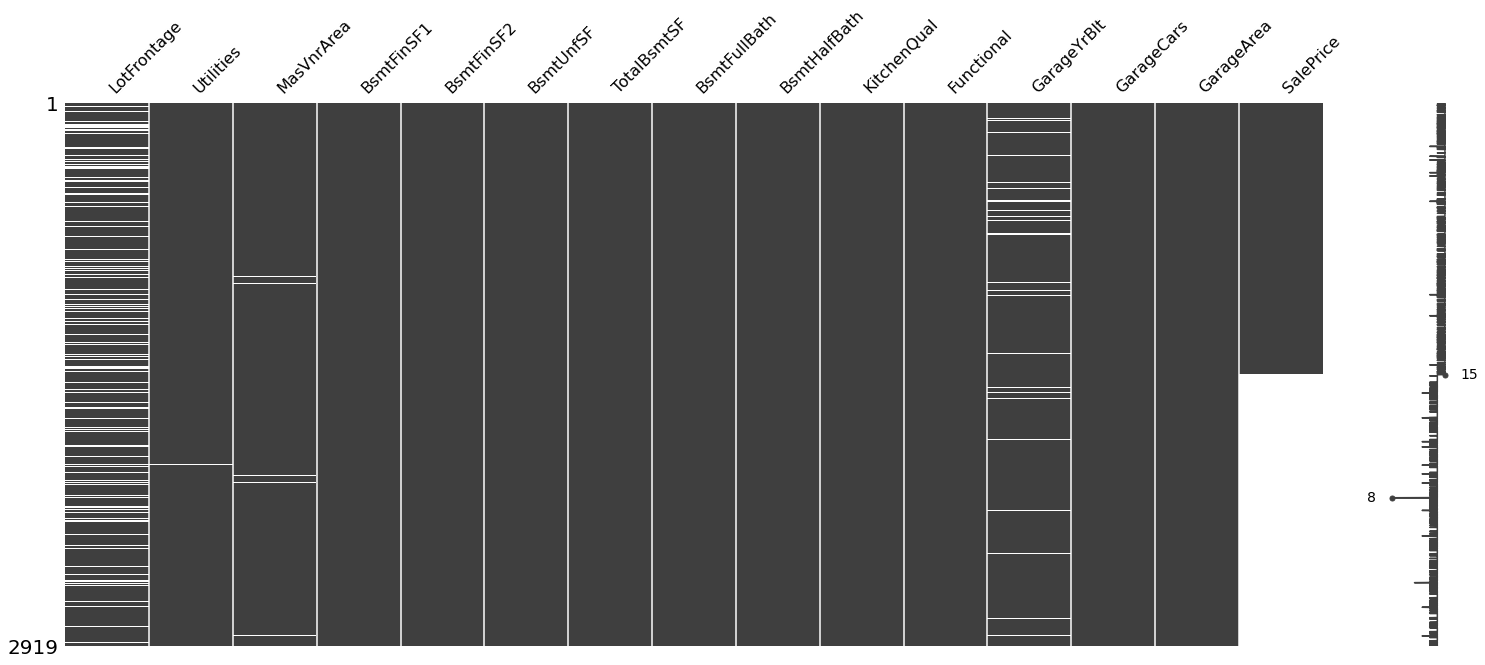

In [31]:
# Get columns that contains NA
has_na = df.isnull().any()
na_features = has_na[has_na].index

ax = msno.matrix(df[na_features])

### LotFrontage
Linear feet of street connected to property

The high frequency of NAs indicates that they have a meaning for this feature. They will be filled with 0, since it is a value that certainly is not being used.

In [32]:
col = "LotFrontage"
df[col] = df[col].fillna(0)

### Utilities
Type of utilities available

This feature description do not preview NAs. It seems to be a single row. In order to avoid losing this information I will fill this NA with the mode.

In [33]:
col = "Utilities"
df[col] = df[col].fillna(df[col].mode()[0])

### MasVnrArea
Masonry veneer area in square feet

NAs represent no Masonry. I will fill them with 0.

In [34]:
col = "MasVnrArea"
df[col] = df[col].fillna(0)

### GarageYrBlt
Year garage was built

NAs represent no garage. The question is to choose to fill with a year in the past or future. Since no garage is usually assosciated with lower value, and old garage is also frequently associated with a lower value, I prefer to fill this value with 0.

In [35]:
col = "GarageYrBlt"
df[col] = df[col].fillna(0)

See `missingno.matrix` again to check if values were correctly removed. 

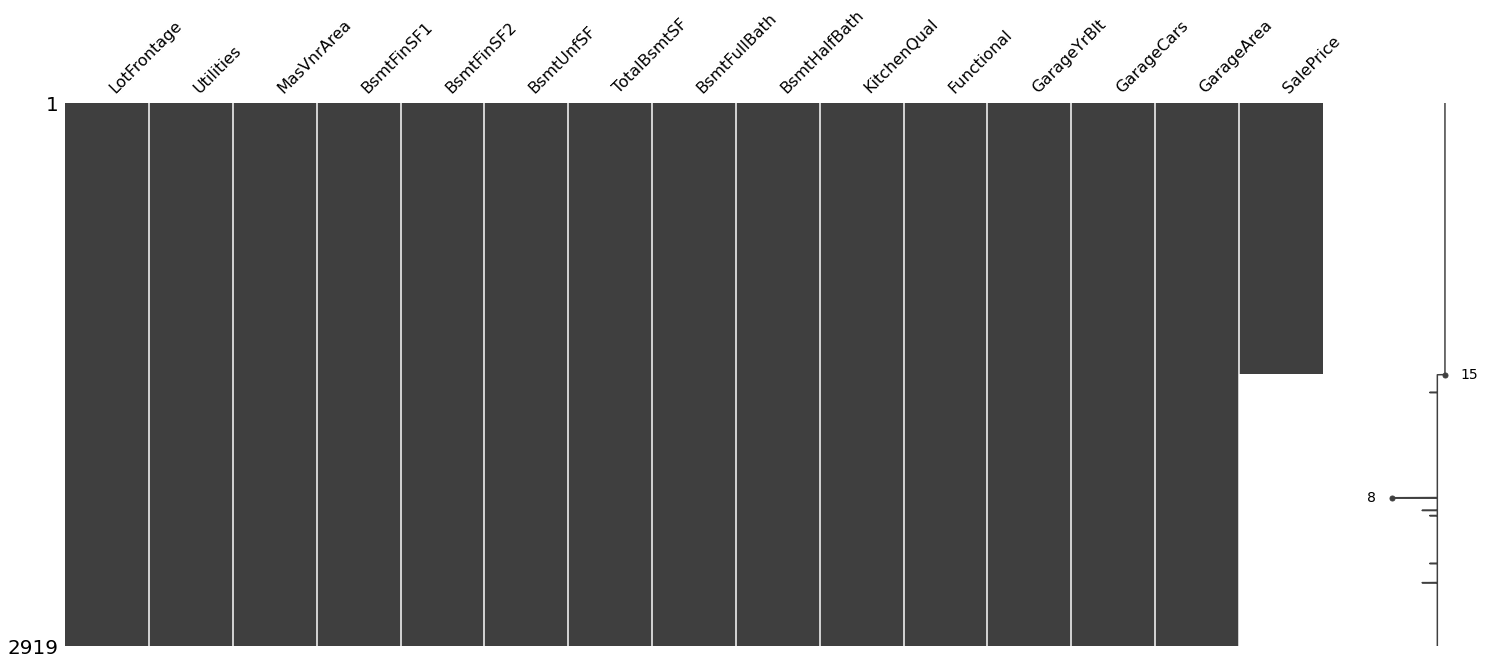

In [36]:
ax = msno.matrix(df[na_features])

Cleaning is done. The train and test can be splitted again. The feature `dataset` is no longer useful.

In [37]:
print(f"Number of Features = {df.shape[1]}")
train = df[df["dataset"] == "train"].drop("dataset", axis=1)
valid = train.sample(train.shape[0] // 10)
train = train.drop(valid.index)

test = df[df["dataset"] == "test"].drop("dataset", axis=1)

Number of Features = 257


# Starting with `autolearn`
Finally is time to start using `autolearn`.
## Assign X and Y

In [38]:
x_train = train.drop(target, axis=1)
y_train = train[target]

x_valid = valid.drop(target, axis=1)
y_valid = valid[target]

x_test = test.drop(target, axis=1)

## `autolearn.Model`

In [39]:
task = "regression"

model = autolearn.Model(task=task)

## `autolearn.Model.tune`

In [40]:
%%time

model.tune(x_train, y_train)
model.params

Wall time: 5min 16s


{'n_estimators': 100,
 'max_depth': 59,
 'learning_rate': 0.17903416219456736,
 'gamma': 14.079206642015373,
 'min_child_weight': 9,
 'max_delta_step': 0,
 'subsample': 0.7366552667006502,
 'colsample_bytree': 0.2896954371934389,
 'colsample_bylevel': 0.998296733666238,
 'colsample_bynode': 0.3137681454003488,
 'reg_alpha': 96.95752433119236,
 'reg_lambda': 1.549010998063297,
 'scale_pos_weight': 0.9585076059359077}

## Scikit-learn API

In [41]:
%%time

model.fit(x_train, y_train)
model.score(x_valid, y_valid)  # Negative Mean Squared Error

Wall time: 933 ms


-25918.923303960633

## Save Kaggle Predictions

In [49]:
predictions = model.predict(x_test)
submission = pd.DataFrame({"Id": x_test.index, "SalePrice": predictions})
submission = submission.set_index("Id")
submission.to_csv("submission.csv")
submission.head()

,SalePrice
Id,
1461,129629.632812
1462,159603.875000
1463,185490.687500
1464,201230.203125
1465,188273.750000


## Selecting Features
After getting the dummies, I ended up with an astonishing amount of columns. 

I will discard useless columns with the `autolearn.feature.Selector` class.

In [50]:
%%time

selector = feature.Selector(train, target, task=task)
selector.transform(
    max_na_ratio=0,
    min_std=.1,
    max_correlation=.9,
    max_single_dependence=None,  # Slow on large datasets
    max_multiple_dependence=None,  # Slow on large datasets
    max_cumulative_importance=.99,
)

train = selector.data

Dropped 0 features with NA ratio greater than 0
Dropped 22 features with normalised standard deviation less than 0.1
Dropped 16 features with correlation greater than 0.9
Dropped 152 features with cumulative importance greater than 0.99
Dropped a total of 190 features
65 features remaining
Wall time: 1min 54s


## Fit model and Score

In [52]:
%%time

# Prepare data

valid = valid[train.columns]
test = test[train.columns]

x_train = train.drop(target, axis=1)
y_train = train[target]

x_valid = valid.drop(target, axis=1)
y_valid = valid[target]

x_test = test.drop(target, axis=1)

# Tune, fit and score

model = autolearn.Model(task=task)
model.tune(x_train, y_train)
model.fit(x_train, y_train)
model.score(x_valid, y_valid)

Wall time: 2min 29s


-30972.71821884347

# Conclusion

`autolearn.Model` offers a very convenient and quick way of creating a predictive model.

`autolearn.feature.Selector` removes less important features. This can be useful when the dataset is too large and need to be reduced.